<a href="https://colab.research.google.com/github/satyaprem95/NLP-LAB-ASSIGNMENT-01/blob/main/073_NLP_ASSIGNMENT_SVC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name  : P. Satya Prem
### PRN   : 22070126073
### Batch : A-3

## **Importing** **Libraries**

In [1]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 30.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
!pip install contractions -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.2 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [4]:
import string, re, nltk
from string import punctuation
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
import spacy
import contractions

## **Importing** **Dataset** **from** **Kaggle**

In [5]:
!pip install kaggle

In [6]:
!kaggle datasets download -d kazanova/sentiment140

Dataset URL: https://www.kaggle.com/datasets/kazanova/sentiment140
License(s): other
 74% 60.0M/80.9M [00:00<00:00, 216MB/s]
100% 80.9M/80.9M [00:00<00:00, 225MB/s]


In [7]:
!unzip /content/sentiment140.zip

Archive:  /content/sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import pandas as pd

df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None)
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

In [ ]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
len(df)

1600000

## **Text** **Cleaning**

In [ ]:
#Regular Expression
regexp = RegexpTokenizer("[\w']+")

In [ ]:
#Lowercase
def text_lower(text):
  text = text.lower()
  return text

In [ ]:
#Remove Whitespace
def remove_whitespace(text):
  text = text.strip() #remove white spaces
  return text

In [ ]:
#Remove Punctuation
def remove_punctuation(text):
  punct = string.punctuation
  punct = punct.replace("'","")
  text = text.translate(str.maketrans("", "",punct))
  return text

In [ ]:
#Remove HTML
def remove_html(text):
  html = re.compile(r'<.*?.')
  text = html.sub(r'',text)
  return text

In [ ]:
def remove_stopwords(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

In [ ]:
def convert_contractions(text):
    text = contractions.fix(text)
    return text

In [ ]:
def lemmatize(text):
    nlp = spacy.load('en_core_web_sm')
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    return ' '.join(tokens)

In [ ]:
# Removing emojis
def remove_emoji(text):
  emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002702-\U000027B0"
    u"\U000024C2-\U0001F251"
    "]+",flags=re.UNICODE
  )
  text = emoji_pattern.sub(r'',text)
  return text

In [ ]:
#Remove URLS
def remove_http_links(text):
  text = re.sub('http://\S+|https://\S+','',text)
  return text

In [ ]:
def discard_non_alpha(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]
    return ' '.join(tokens)

In [ ]:
def remove_usernames(text):
    return re.sub(r'@\w+', '', text)

In [ ]:
def clean_text(text):
    text = text_lower(text)
    text = remove_whitespace(text)
    text = re.sub('\n', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = remove_http_links(text)
    text = remove_usernames(text)
    text = remove_punctuation(text)
    text = remove_html(text)
    text = remove_emoji(text)
    text = convert_contractions(text)
    text = remove_stopwords(text)
    text = discard_non_alpha(text)
    text = lemmatize(text)
    return text

In [ ]:
# df['cleaned_text'] = df['text'].apply(clean_text)
df.head()

In [ ]:
df.to_csv('cleaned_data.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/cleaned_data.csv")

In [ ]:
df.head()

,target,ids,date,flag,user,text,cleaned_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",awww bummer shoulda get david carr third day
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset update facebook texting might cry result...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,dive many time ball manage save rest go bound
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole body feel itchy like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",behave mad see


In [ ]:
df.cleaned_text.isna().sum()

8782

In [ ]:
df.cleaned_text.isna().sum()

0

The Count Vectorizer is a straightforward text representation technique used in natural language processing. It transforms text data into a numerical format by counting the number of times each word appears in a document. This method creates a sparse matrix where rows represent documents and columns represent words from the vocabulary.

The TF-IDF (Term Frequency-Inverse Document Frequency) Vectorizer is a more advanced text representation technique that builds on the Count Vectorizer by incorporating the importance of words across a corpus. It combines two metrics: term frequency (TF), which measures how frequently a word appears in a document, and inverse document frequency (IDF), which evaluates how unique or rare a word is across all documents.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1, 2))
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])

In [1]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
#  Split data
X_train_count, X_test_count, y_train, y_test = train_test_split(X_count, df['target'], test_size=0.3, random_state=42, stratify = df['target'])

In [ ]:
# Split data
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df['target'], test_size=0.3, random_state=42, stratify = df['target'])

Support Vector Classification (SVC) is a powerful supervised learning algorithm used for classification tasks. SVC, a type of Support Vector Machine (SVM), aims to find the optimal hyperplane that separates data points into different classes with the maximum margin. This hyperplane is determined by the support vectors, which are the data points closest to the decision boundary.



In [ ]:
from sklearn.svm import SVC

SVC with CountVectorizer
              precision    recall  f1-score   support

           0       0.77      0.71      0.74    240000
           4       0.73      0.79      0.76    240000

    accuracy                           0.75    480000
   macro avg       0.75      0.75      0.75    480000
weighted avg       0.75      0.75      0.75    480000



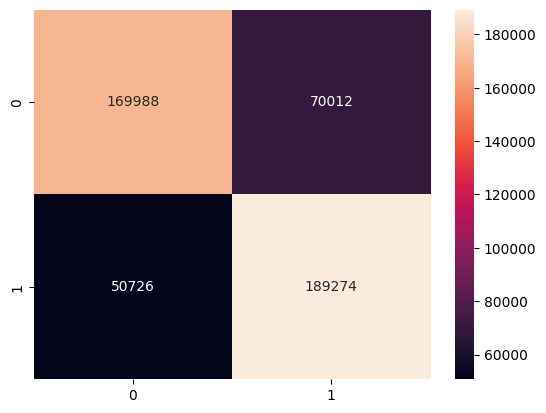

In [ ]:
# SVC with CountVectorizer
svc_count = SVC(C=1.0, kernel='linear', gamma='scale', probability=False, random_state=42)
svc_count.fit(X_train_count[:100000], y_train[:100000])
y_pred_count_svc = svc_count.predict(X_test_count)

# Classification Report and Confusion Matrix
print("SVC with CountVectorizer")
print(classification_report(y_test, y_pred_count_svc))
cm_count_svc = confusion_matrix(y_test, y_pred_count_svc)
sns.heatmap(cm_count_svc, annot=True, fmt='d')
plt.show()

SVC with TFIDFVectorizer
              precision    recall  f1-score   support

           0       0.77      0.72      0.75    240000
           4       0.74      0.78      0.76    240000

    accuracy                           0.75    480000
   macro avg       0.75      0.75      0.75    480000
weighted avg       0.75      0.75      0.75    480000



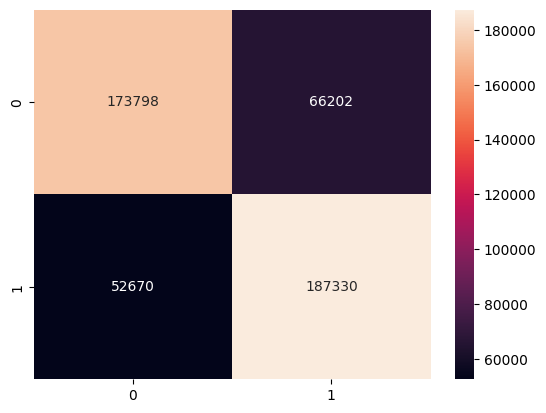

In [ ]:
# SVC with TFIDFVectorizer
svc_tfidf = SVC(C=1.0, kernel='linear', gamma='scale', probability=False, random_state=42)
svc_tfidf.fit(X_train_tfidf[:100000], y_train[:100000])
y_pred_tfidf_svc = svc_tfidf.predict(X_test_tfidf)

# Classification Report and Confusion Matrix
print("SVC with TFIDFVectorizer")
print(classification_report(y_test, y_pred_tfidf_svc))
cm_tfidf_svc = confusion_matrix(y_test, y_pred_tfidf_svc)
sns.heatmap(cm_tfidf_svc, annot=True, fmt='d')
plt.show()

In [8]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [9]:
!pip install pypandoc


In [10]:
!jupyter nbconvert --to PDF "drive/My drive/Colab Notebooks/073_NLP_ASSIGNMENT_SVC.ipynb"

[NbConvertApp] WARNING | pattern 'drive/My drive/Colab Notebooks/073_NLP_ASSIGNMENT_SVC.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [-